# Decision Trees
In this example we use a dataset were data was collected about a set of patients suffering from the same illness. During the treatment the patients responded positively to one of 5 medications: Drug A, Drug B, Drug c, Drug x and Drug y.

We intend to create a decision tree to find out which drug will have the best result for a given patient with the same illness. 

The data for this example was included in the IBM Data Science Professional Certification.

## Data collection

In [14]:
#Let's import some libraries
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [15]:
#We use !get to download the data from IBM Object Storage
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
await download(path,"drug200.csv")
path="drug200.csv"

Let's check the data

In [16]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Let's create a Feature Matrix from my_data

In [17]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Unfortunately, some of the features are categorical and will need to be pre-processed either by creating dummy variables or using `LabelEncoder` to convert them into numerical/indicator variables

In [18]:
from sklearn import preprocessing
#let's transform Sex, Blood Pressure and Cholesterol into indicator variables
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

#Let's see the result of this transformations
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

We can now create the target variable `y` with the Drug names

In [19]:
y = my_data["Drug"]
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

## Setting up the Decision Tree

We use `train_test_split` to split the dataset into train and test data

In [21]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=123)

## Modeling

We can create a `TreeClassifier` object, using the "entropy" criterion to decide what discriminant is used to create the decision tree

In [23]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

We can use this to fit our train set to train the model

In [25]:
#Let's fit the model on our train set
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction and evaluation
We can now use the tree we generated to make predictions and use the `metrics` module to generate emtrics to evaluate the accuracy of the tree

In [28]:
#Let's use the predict function on the test set
predTree = drugTree.predict(X_testset)

In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Accuracy:  0.9833333333333333


## Visualization

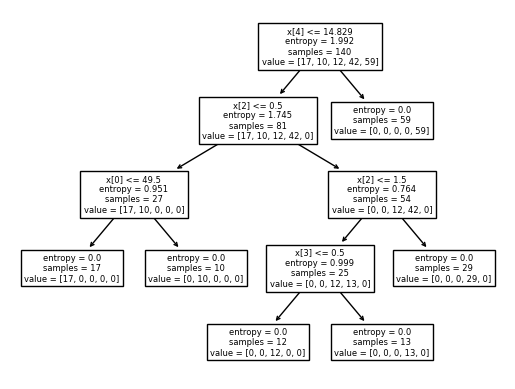

In [30]:
tree.plot_tree(drugTree)
plt.show()